In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os


For color strip

In [ ]:
min_YCrCb = np.array([0,133,77],np.uint8)
max_YCrCb = np.array([235,173,127],np.uint8)
print(min_YCrCb)
print(max_YCrCb)
# Load the image
palette_image = cv2.imread("Media (4).jpeg")

# Convert the image to YCrCb color space
# imageYCrCb = cv2.cvtColor(palette_image, cv2.COLOR_BGR2YCR_CB)

# # Create a mask for the skin region
# skinRegionYCrCb = cv2.inRange(imageYCrCb, min_YCrCb, max_YCrCb)

# # Apply the mask to extract the skin region
# skinYCrCb = cv2.bitwise_and(palette_image, palette_image, mask=skinRegionYCrCb)
# palette_image = cv2.cvtColor(skinYCrCb, cv2.COLOR_BGR2RGB)
# plt.imshow(palette_image)

# # resizing image
# # resized_image = cv2.resize(image, (1200, 600))

# # modifing the image
# modified_image = cv2.resize(palette_image, (1200, 1200), interpolation = cv2.INTER_AREA)
# modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

# # training the model
# clf = KMeans(n_clusters = 7)
# labels = clf.fit_predict(modified_image)

# # getting RBG values
# cluster_centers_rgb = clf.cluster_centers_.astype(int)

# # Store RGB values in the palette_colors array
# palette_colors = []
# for i, color in enumerate(cluster_centers_rgb):
#     palette_colors.append(color)

# print("palette_colors", palette_colors)

[  0 133  77]
[235 173 127]


For fetching skin tone from image

min_YCrCb [  0 133  77]
max_YCrCb [235 173 127]


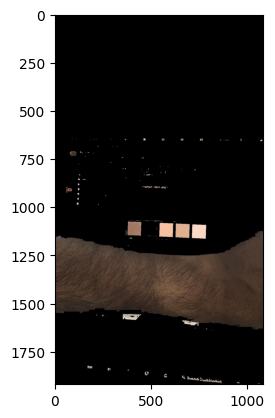

In [ ]:
min_YCrCb = np.array([0,133,77],np.uint8)
max_YCrCb = np.array([235,173,127],np.uint8)

print("min_YCrCb", min_YCrCb)
print('max_YCrCb', max_YCrCb)

# Load the image
image = cv2.imread("Media (1).jpeg")

# Convert the image to YCrCb color space
imageYCrCb = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)

# Create a mask for the skin region
skinRegionYCrCb = cv2.inRange(imageYCrCb, min_YCrCb, max_YCrCb)

# Apply the mask to extract the skin region
skinYCrCb = cv2.bitwise_and(image, image, mask=skinRegionYCrCb)
image = cv2.cvtColor(skinYCrCb, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
resized_image = cv2.resize(image, (1200, 600))

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
modified_image = cv2.resize(image, (1200, 1200), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
print("modified_image", modified_image)

modified_image [[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


Training Model

In [ ]:
clf = KMeans(n_clusters = 5)
labels = clf.fit_predict(modified_image)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Block Chart

In [ ]:
# Get cluster centroids
centroids = clf.cluster_centers_

# Filter out black centroids (assuming black is [0, 0, 0])
non_black_centroids = [centroid for centroid in centroids if not np.array_equal(centroid, [0, 0, 0])]

# Display the non-black dominant colors
# for i, color in enumerate(non_black_centroids):
#     color_rgb = np.uint8(color)
#     plt.subplot(1, len(non_black_centroids), i + 1)
#     plt.imshow([[color_rgb]])
#     plt.axis('off')

# plt.show()

# Display only the second non-black dominant color
skin_tone = None
if len(non_black_centroids) >= 2:
    second_dominant_color = non_black_centroids[1]
    skin_tone = np.uint8(second_dominant_color)
    print("COLOR_RGB", skin_tone)
    # plt.imshow([[color_rgb]])
    # plt.axis('off')
    # plt.show()
else:
    print("Not enough non-black dominant colors found.")

COLOR_RGB [124  89  66]


Palette Colors: [array([241, 203, 183]), array([0, 0, 0]), array([118,  55,  45]), array([226, 164, 153]), array([199, 135, 111]), array([235, 179, 146]), array([253, 213, 177])]
distace [200.93282459568422, 166.29191201017565, 40.4103947023535, 153.6164053739053, 98.82307422864359, 163.77118183612157, 210.56590417254168]
Skin Tone:


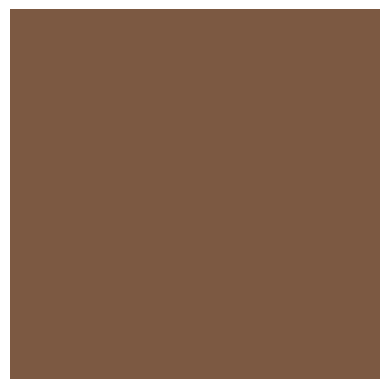

Palette:


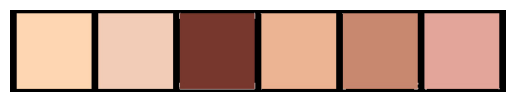

Closest Color:


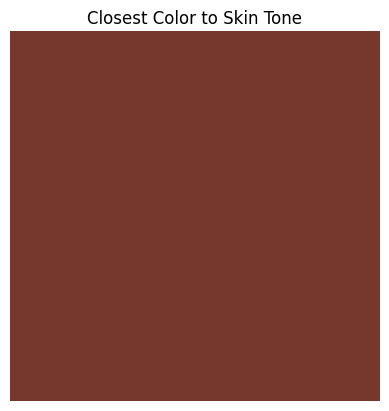

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Assuming palette_colors is your array of RGB values from the color palette
print("Palette Colors:", palette_colors)

# Calculate Euclidean distances between skin_tone and each color in palette_colors
distances = [distance.euclidean(skin_tone, color) for color in palette_colors]
print("distace", distances)

# Find the index of the closest color in the palette
closest_color_index = distances.index(min(distances))

# Get the closest color from the palette
closest_color = palette_colors[closest_color_index]

# Create a small square image with the closest color
closest_color_image = [[closest_color] * 10] * 10

# second way
def closest(colors,color):
    colors = np.array(colors)
    color = np.array(color)
    distances = np.sqrt(np.sum((colors-color)**2,axis=1))
    index_of_smallest = np.where(distances==np.amin(distances))
    smallest_distance = colors[index_of_smallest]
    return smallest_distance

closest_color = closest(palette_colors,skin_tone)

# Display the skin tone
print("Skin Tone:")
plt.imshow([[skin_tone]])
plt.axis('off')
plt.show()

# Display the palette
print("Palette:")
plt.imshow(palette_image)
plt.axis('off')
plt.show()

# Display the closest color
print("Closest Color:")
plt.imshow(closest_color_image)
plt.axis('off')
plt.title('Closest Color to Skin Tone')
plt.show()



Pie Chart

([<matplotlib.patches.Wedge at 0x7e29c3846260>,
 [Text(-0.8838684166707584, 0.6548103710326577, '#020101'),
  Text(0.8838684166707583, -0.6548103710326578, '#ab8571')])

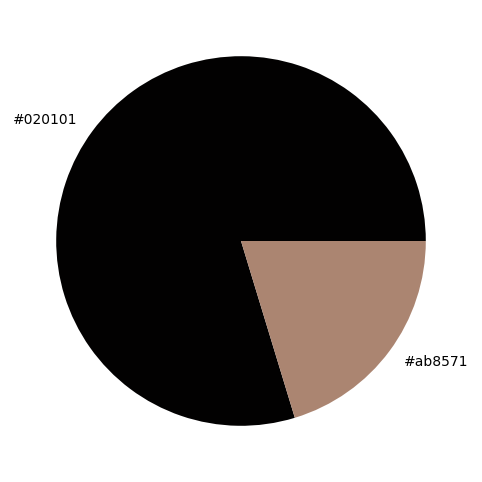

In [ ]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

plt.figure(figsize = (8, 6))
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

Finding frequecy of the colors

In [ ]:
import cv2
import numpy as np

def find_predominant_colors(image_path):
    # Read the image
    palette_image = cv2.imread(image_path)

    # Convert the image to YCrCb color space
    imageYCrCb = cv2.cvtColor(palette_image, cv2.COLOR_BGR2YCR_CB)

    # Create a mask for the skin region
    skinRegionYCrCb = cv2.inRange(imageYCrCb, min_YCrCb, max_YCrCb)

    # Apply the mask to extract the skin region
    skinYCrCb = cv2.bitwise_and(palette_image, palette_image, mask=skinRegionYCrCb)
    palette_image = cv2.cvtColor(skinYCrCb, cv2.COLOR_BGR2RGB)

    # Check if the image is loaded successfully
    if palette_image is None:
        print("Could not open or find the image")
        return

    # Convert the image from BGR to RGB
    image = cv2.cvtColor(palette_image, cv2.COLOR_BGR2RGB)

    # Reshape the image to a 2D array of pixels (rows x columns, 3 channels)
    reshaped_image = image.reshape(-1, 3)

    # Create a dictionary to store the frequency of each color
    color_frequency = {}

    # Iterate through each pixel and count the frequency of each color
    for color in reshaped_image:
        color_tuple = tuple(color)
        color_frequency[color_tuple] = color_frequency.get(color_tuple, 0) + 1

    # Find the predominant colors
    predominant_colors = sorted(color_frequency.items(), key=lambda x: x[1], reverse=True)

    # Display the predominant colors and their frequencies
    print("Predominant colors:")
    for color, frequency in predominant_colors:
        if frequency > 1:
          print(f"Color: {color} Frequency: {frequency}")

# Example usage
# image_path = "example_image.jpg"
find_predominant_colors("Media (4).jpeg")

Edge detection in image

Average colors (in BGR): [(1.7057467532467532, 1.665245670995671, 1.6603187229437228), (1.6935838744588743, 1.6503160173160172, 1.6541060606060605), (5.254943181818182, 5.2394329004329, 5.411465909090909), (4.700354978354978, 4.717302489177489, 5.143245129870129), (4.59320183982684, 4.610344155844156, 5.054336038961039), (4.190975649350649, 4.395742965367965, 4.969007575757575), (16.093147727272726, 16.276615259740257, 17.019605519480518)]


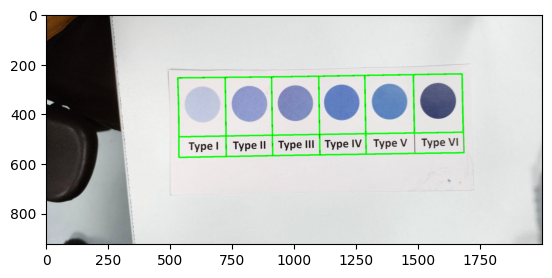

In [ ]:
import cv2
import numpy as np

# Function to calculate the average color within a contour
def get_average_color(image, contour):
    mask = np.zeros(image.shape[:2], dtype="uint8")  # Create a mask for the contour
    cv2.drawContours(mask, [contour], -1, 255, -1)  # Fill the contour with white on the mask
    mean = cv2.mean(image, mask=mask)[:3]  # Calculate the mean color of the area of the contour
    return mean

# Function to convert BGR color to RGB
def bgr_to_rgb(color):
    return color[2], color[1], color[0]

# Load the image
img_path = "Media (4).jpeg"  # Adjust the path to your image
img = cv2.imread(img_path)

# Convert to grayscale for edge detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to help with edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform Canny edge detection
# Perform Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Find contours from the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image for visualization
img_with_contours = img.copy()

# Filter contours based on area and compute the average color
average_colors = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 1000:  # Adjust this threshold as needed
        # Draw contour on the original image for visualization
        cv2.drawContours(img_with_contours, [contour], -1, (0, 255, 0), 2)

        # Create a mask for the contour
        mask = np.zeros(img.shape[:2], dtype="uint8")
        cv2.drawContours(mask, [contour], -1, 255, -1)

        # Apply the mask to the original image
        masked_image = cv2.bitwise_and(img, img, mask=mask)

        # Calculate the mean color within the contour area
        mean_color = cv2.mean(masked_image)[:3]
        average_colors.append(mean_color)

# Output the average colors
print("Average colors (in BGR):", average_colors)

# Show the images for debugging
plt.imshow( edges)
plt.imshow(img_with_contours)


conntours 12
Average colors (in BGR): [(195.00299652403214, 201.07209636821287, 221.87276758959607), (151.05080804557608, 160.1522497384025, 206.7920009301244), (133.39487720532208, 143.4350272551433, 191.48566906980832), (106.49199005262854, 134.72841362558557, 196.02313342201145), (107.23916180800093, 142.7024764763609, 193.87040350978467), (84.75823984188804, 91.02633261640412, 125.83438935069465)]
Average colors (in RGB): [(221.87276758959607, 201.07209636821287, 195.00299652403214), (206.7920009301244, 160.1522497384025, 151.05080804557608), (191.48566906980832, 143.4350272551433, 133.39487720532208), (196.02313342201145, 134.72841362558557, 106.49199005262854), (193.87040350978467, 142.7024764763609, 107.23916180800093), (125.83438935069465, 91.02633261640412, 84.75823984188804)]


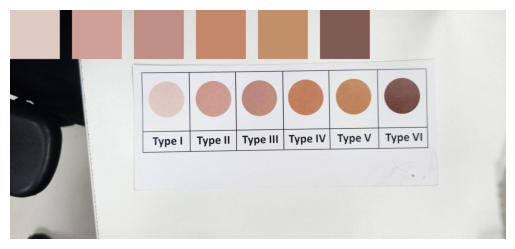

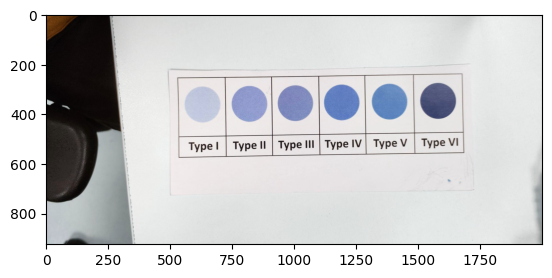

In [ ]:
# fetching image
img = cv2.imread("Media (4).jpeg")
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
min_YCrCb = np.array([0,133,77])
max_YCrCb = np.array([235,173,127])
# Masking image
# Convert the image to YCrCb color space
imageYCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)

# Create a mask for the skin region
skinRegionYCrCb = cv2.inRange(imageYCrCb, min_YCrCb, max_YCrCb)

# Apply the mask to extract the skin region
skinYCrCb = cv2.bitwise_and(palette_image, palette_image, mask=skinRegionYCrCb)
# palette_image = cv2.cvtColor(skinYCrCb, cv2.COLOR_BGR2RGB)

# Masked image

# Applying blur
# Convert to grayscale for edge detection
gray = cv2.cvtColor(skinYCrCb, cv2.COLOR_BGR2GRAY)
# Apply Gaussian Blur to help with edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# plt.imshow(blurred)

# Perform Canny edge detection
edges = cv2.Canny(blurred, 50, 150)
plt.imshow(edges)
# edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
# plt.imshow(edges)

# Find contours from the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Filter contours based on area and compute the average color
print("conntours", len(contours))
average_colors = []
for contour in contours:

    area = cv2.contourArea(contour)
    if area > 1000:  # Adjust this threshold as needed
        # Create a mask for the current contour
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [contour], -1, 255, -1)

        # Mask the original image to extract the region bounded by the contour
        masked_image = cv2.bitwise_and(img, img, mask=mask)

        # Calculate the average color within the masked region
        mean_color = cv2.mean(masked_image, mask=mask)[:3]
        average_colors.append(mean_color)


# Output the average colors
print("Average colors (in BGR):", average_colors)

def bgr_to_rgb(color):
    return color[2], color[1], color[0]

# Output the average colors in RGB format
average_colors_rgb = [bgr_to_rgb(color) for color in average_colors]

# Print the average colors in RGB format
print("Average colors (in RGB):", average_colors_rgb)

img_with_colors = img.copy()
for idx, color in enumerate(average_colors_rgb):
    # Calculate the position for the rectangle
    x = idx * 250  # Adjust the spacing between rectangles as needed
    y = 0
    width = 200
    height = 200
    # Convert BGR to RGB color
    rgb_color = bgr_to_rgb(color)
    # Draw a rectangle filled with the average color
    cv2.rectangle(img_with_colors, (x, y), (x + width, y + height), rgb_color, -1)

# Show the image with rectangles filled with the average colors
# Convert image from BGR to RGB for displaying with matplotlib
img_with_colors_rgb = cv2.cvtColor(img_with_colors, cv2.COLOR_BGR2RGB)

# Show the image with rectangles filled with the average colors using matplotlib
plt.imshow(img_with_colors_rgb)
plt.axis('off')  # Turn off axis
plt.show()
plt.imshow(img)